In [25]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
#Load the data sets- train and test 
df=pd.read_csv('Week7_train.csv')
df.shape


(42000, 785)

In [31]:
mf=df.sample(frac=0.1)
mf.shape


(4200, 785)

In [4]:
#  Select only 10% of the data from experiment. We will not use total data as KNN is computationally expensive
mf=df.sample(frac=0.1,random_state=1)

In [ ]:
naresh=mf['label'].value_counts()
print(naresh)



label
7    461
1    449
2    438
3    428
9    427
0    419
4    410
6    400
8    392
5    376
Name: count, dtype: int64


In [6]:
# Find no of unique class labels in training data
mf.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
# Find no of unique class labels in training data
uniq=mf['label'].nunique()
print(uniq)

10


In [20]:
# 8. Print the no of examples for each class label
# You are asked to count how many examples (rows) belong to each unique class label in the "label" column.

# The "label" column represents class labels.
# The goal is to count how many times each unique label appears in the dataset.
# # This helps understand class distribution, which is useful for classification problems to check for class imbalance.

naresh=mf['label'].value_counts()
print(naresh)


label
1    488
4    426
3    423
2    421
0    420
9    414
8    411
7    403
6    403
5    391
Name: count, dtype: int64


In [9]:
# prpare X and Y

X = mf.drop(columns=['label'])

# Y: Target variable (only 'label' column)
Y = mf['label']

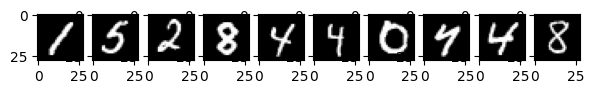

In [10]:
plt.figure(figsize=(7,7))

for i in range(10):
    image=X.iloc[i].values.reshape(28,28)
    plt.subplot(1,10,i+1)
    plt.imshow(image,cmap='gray')
    # plt.axis('off')

plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

model= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [13]:
y_pred=model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy Score ",accuracy_score(Y_test,y_pred))
print("Consfusion matrix \n ",confusion_matrix(Y_test,y_pred))
print("classification Report \n",classification_report(Y_test,y_pred))


Accuracy Score  0.9171428571428571
Consfusion matrix 
  [[ 91   0   0   0   0   1   1   0   0   0]
 [  0 128   1   0   0   0   0   0   0   0]
 [  5   6  91   1   1   0   0   2   2   0]
 [  0   2   0  97   0   1   1   0   1   0]
 [  0   0   0   0 116   1   1   0   0   7]
 [  1   0   0   7   1  84   1   0   0   1]
 [  0   2   0   0   1   2  97   0   0   0]
 [  0   6   2   0   0   0   0  99   0   3]
 [  1   1   1   5   0   2   3   0  77   4]
 [  1   1   0   3   1   1   0   2   0  83]]
classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        93
           1       0.88      0.99      0.93       129
           2       0.96      0.84      0.90       108
           3       0.86      0.95      0.90       102
           4       0.97      0.93      0.95       125
           5       0.91      0.88      0.90        95
           6       0.93      0.95      0.94       102
           7       0.96      0.90      0.93       110
  

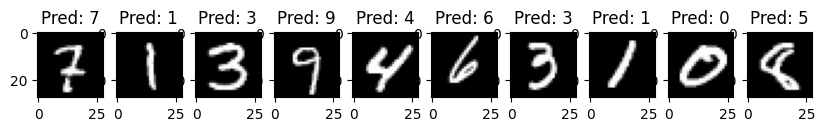

In [44]:
# # 17

# for i in range(40):
#     image=X_test.iloc[i].values.reshape(28,28)
#     pred_image=model.predict([X_test.iloc[i].values])[0]
#     plt.subplot(1,40,i+1)
#     plt.imshow(image)
#     plt.title(pred_image)
#     plt.axis('off')

# plt.show()



plt.figure(figsize=(10, 2))

for i in range(10):
    image = X_test.iloc[i].values.reshape(28, 28)  # Reshape pixel data
    plt.subplot(1, 10, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    # plt.axis('off')

# plt.tight_layout()
plt.show()

